## Task
Figure out rules for generation samples of 16 english letters (possibly repetitive) which could be used to produce _reasonable_ number of words (of different length) from the top 40k (supposed to be estimated size of vocabulary of native speakers with higher education) most frequently used words.

## Data source
https://gist.github.com/h3xx/1976236

"Wictionary top 100,000 most frequently-used English words"

This file is filtered from the comments, words consisting of less than 3 letters, words containing anything beside regular Enghlish letters (a-z), duplications, words consisting of the same letter and translated to all lower case with the following command:
```
grep -vE "^#" wiki-100k.txt | tr '[:upper:]' '[:lower:]' | sort | uniq | grep -vE "^[a-z]{1,2}$" | grep -vE "[^a-z]" | grep -vE "^([a-z])\1+$" > filtered-words
```

## Max number of repetitions
Let's begin with finding out the maximum number of repetitions for each letter. First of all let's consider only words of 16 or less number of letters, then calculate the number of letter occurrence in every word, and print the statistics of the result

In [25]:
from pandas import DataFrame as df
from pandas import read_csv
vowels = 'aeiouy'
consonants = 'bcdfghjklmnpqrstvwxz'

words = read_csv('filtered-words', keep_default_na = False, names = ['words', ])
words['len'] = words.apply(lambda row: len(row['words']), axis = 1)
applicable_words = words.loc[words['len'] <= 16]
for letter in vowels + consonants:
    applicable_words[letter] = applicable_words.apply(lambda row: row['words'].count(letter), axis = 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [26]:
applicable_words.describe()

,len,a,e,i,o,u,y,b,c,d,...,n,p,q,r,s,t,v,w,x,z
count,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,...,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000,62538.000000
mean,7.303432,0.597493,0.921488,0.587195,0.429659,0.273498,0.101091,0.134798,0.272203,0.280549,...,0.562650,0.185231,0.016326,0.538441,0.550529,0.484489,0.094742,0.065368,0.019556,0.024625
std,2.307272,0.697471,0.839261,0.709280,0.621132,0.497175,0.306814,0.364697,0.507634,0.514540,...,0.693412,0.438892,0.128482,0.640935,0.715630,0.652254,0.299982,0.252995,0.143906,0.163026
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,6.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000,2.000000,2.000000,4.000000,2.000000


Some letters have rather unexpected max number of occurrences, e.g. ```a``` occurs 6 times in some of the words. Taking a closer look at the result reveals one subtle issue:

In [27]:
applicable_words.loc[applicable_words['a'] > 3]

,words,len,a,e,i,o,u,y,b,c,...,n,p,q,r,s,t,v,w,x,z
7,aangenaam,9,4,1,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1147,ainakaan,8,4,0,1,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1153,ainoastaan,10,4,0,1,1,0,0,0,0,...,2,0,0,0,1,1,0,0,0,0
1215,alabama,7,4,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1417,allahabad,9,4,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1690,amalgamate,10,4,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1691,amalgamated,11,4,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1692,amalgamation,12,4,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1917,anastasia,9,4,0,1,0,0,0,0,0,...,1,0,0,0,2,1,0,0,0,0
1928,anaxagoras,10,4,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0


### Account for the outliers
Unfortunately some of the words in the dictionary appear to be proper names, which may have rather unusual distribution of letters. So the goal of this step is to filter out those outliers, and get the maximum allowed limit for each letter. As a simple measure let's estimate it by the 99-th percentile.

In [59]:
max_limits = {}
for letter in vowels + consonants:
    max_limits[letter] = applicable_words.loc[applicable_words[letter] > 0, [letter]].quantile(0.99)[letter]
print(max_limits)

{'a': 3.0, 'e': 3.0, 'i': 3.0, 'o': 3.0, 'u': 2.0, 'y': 2.0, 'b': 2.0, 'c': 2.0, 'd': 2.0, 'f': 2.0, 'g': 2.0, 'h': 2.0, 'j': 1.0, 'k': 2.0, 'l': 3.0, 'm': 2.0, 'n': 3.0, 'p': 2.0, 'q': 2.0, 'r': 2.0, 's': 3.0, 't': 3.0, 'v': 2.0, 'w': 2.0, 'x': 2.0, 'z': 2.0}


## Frequency distribution of letters
Now let's take a closer look at the distribution of frequency distribution of letters. Let's approximate distribution function $p(x)$ by $a \cdot \exp^{-x \cdot b}$ and determine $a, b$ from the experimental data that we have. After that let's define cumulative distribution function $F(x)$ to determine normalization coefficient so that $\max(F(x)) = 1$.

p(x) = 0.11759228277441307 * exp(-x * 0.11009215981247603)


<IPython.core.display.Javascript object>


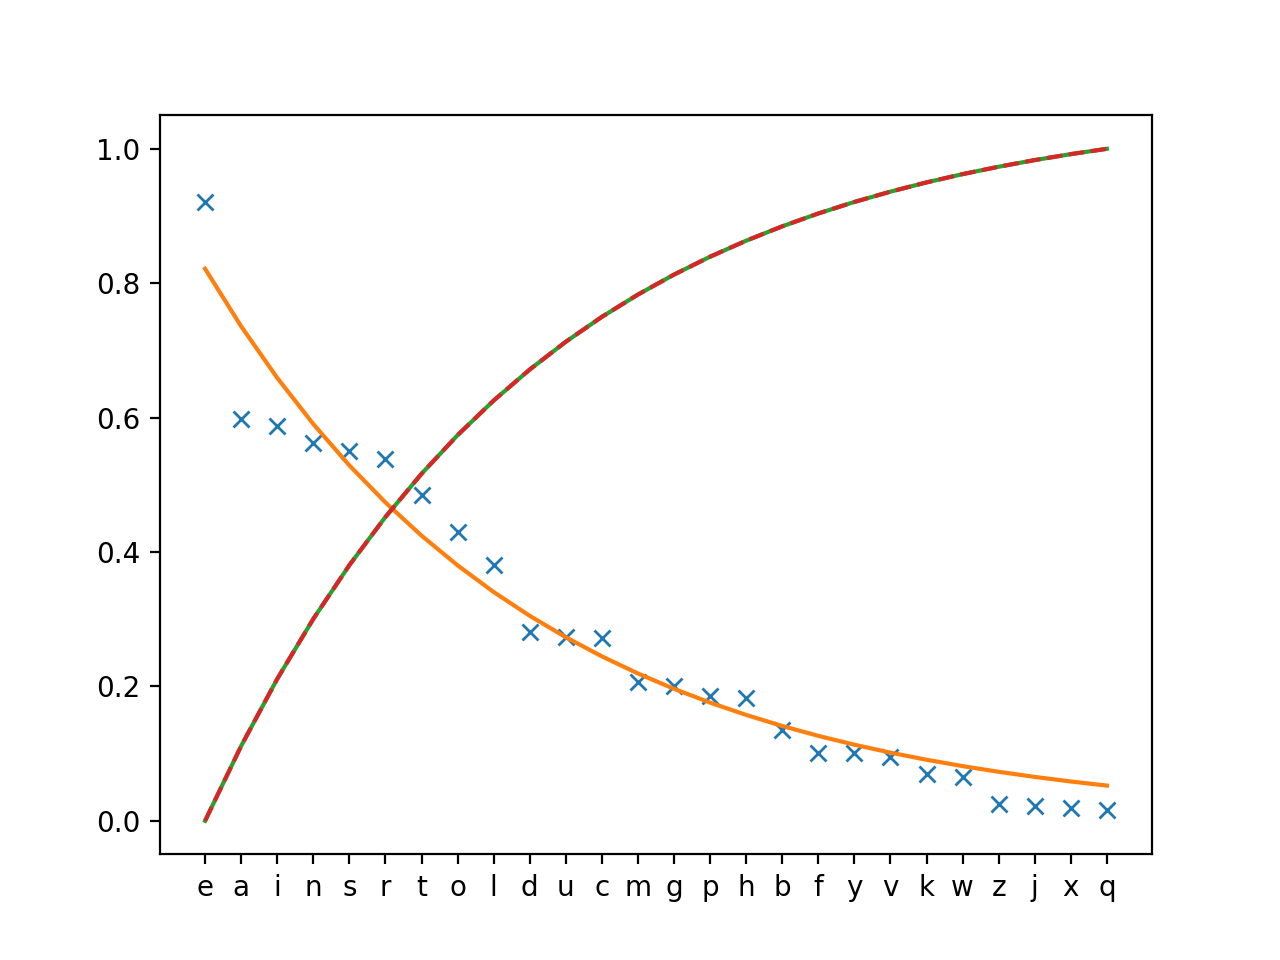

a / b = 1.0681258590503837


In [29]:
stats = applicable_words.loc[:,vowels[0]:consonants[-1]].describe()
stats = stats.T.sort_values(by = 'mean', ascending = False).T

from scipy.optimize import curve_fit
import pylab as plt
import numpy as np
import scipy.integrate as integrate

%matplotlib notebook

xdata = [*range(len(list(stats)))]
ydata = stats.T['mean']
func = lambda x, a, b: a * np.exp(-x * b)
popt, pcov = curve_fit(func, xdata, ydata)

c_normalize, _ = integrate.quad(lambda x: func(x, *popt), min(xdata), max(xdata))
print("p(x) = {0} * exp(-x * {1})".format(popt[0] / c_normalize, popt[1]))

cumulative = lambda x: integrate.quad(lambda x: func(x, *popt), min(xdata), x)[0] / c_normalize
cumulative_t = lambda x: popt[0] / c_normalize / popt[1] * (1 - np.exp(-x * popt[1]))

plt.plot(list(stats), stats.T['mean'], 'x')
plt.plot(xdata, [func(x, *popt) for x in xdata])
plt.plot(xdata, [cumulative(x) for x in xdata])
plt.plot(xdata, [cumulative_t(x) for x in xdata], '--')
plt.show()
print("a / b = {0}".format(popt[0] / popt[1] / c_normalize))

Now that both cumulative distribution function and normalization coefficient are defined we can use inverse function to get a sample of the given distribution from the uniform random distribution. The iverse function is obviously:
\begin{align}
F_X &= 1.0681258590503837 \cdot (1 - \cdot \exp(-x \cdot 0.11009215981247603) ) \\
F^{-1} &= -\dfrac{\log \left(1 - \dfrac{F_X}{1.0681258590503837} \right)}{0.11009215981247603}
\end{align}

### Sample generation
Now let's generate sample of uniform distribution, and get a sample of the required distribution out of it using inverse function

<IPython.core.display.Javascript object>


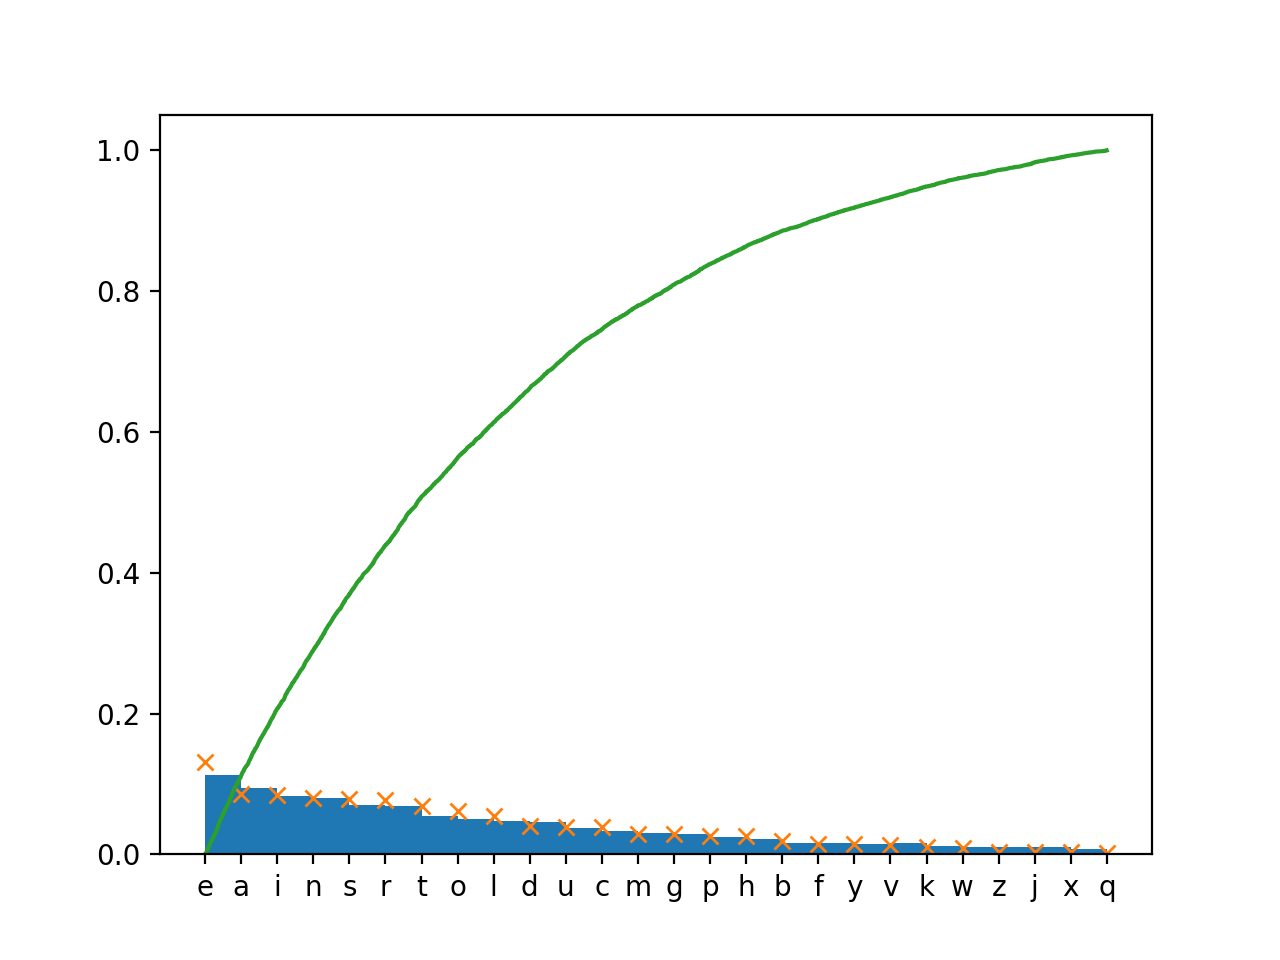

<IPython.core.display.Javascript object>


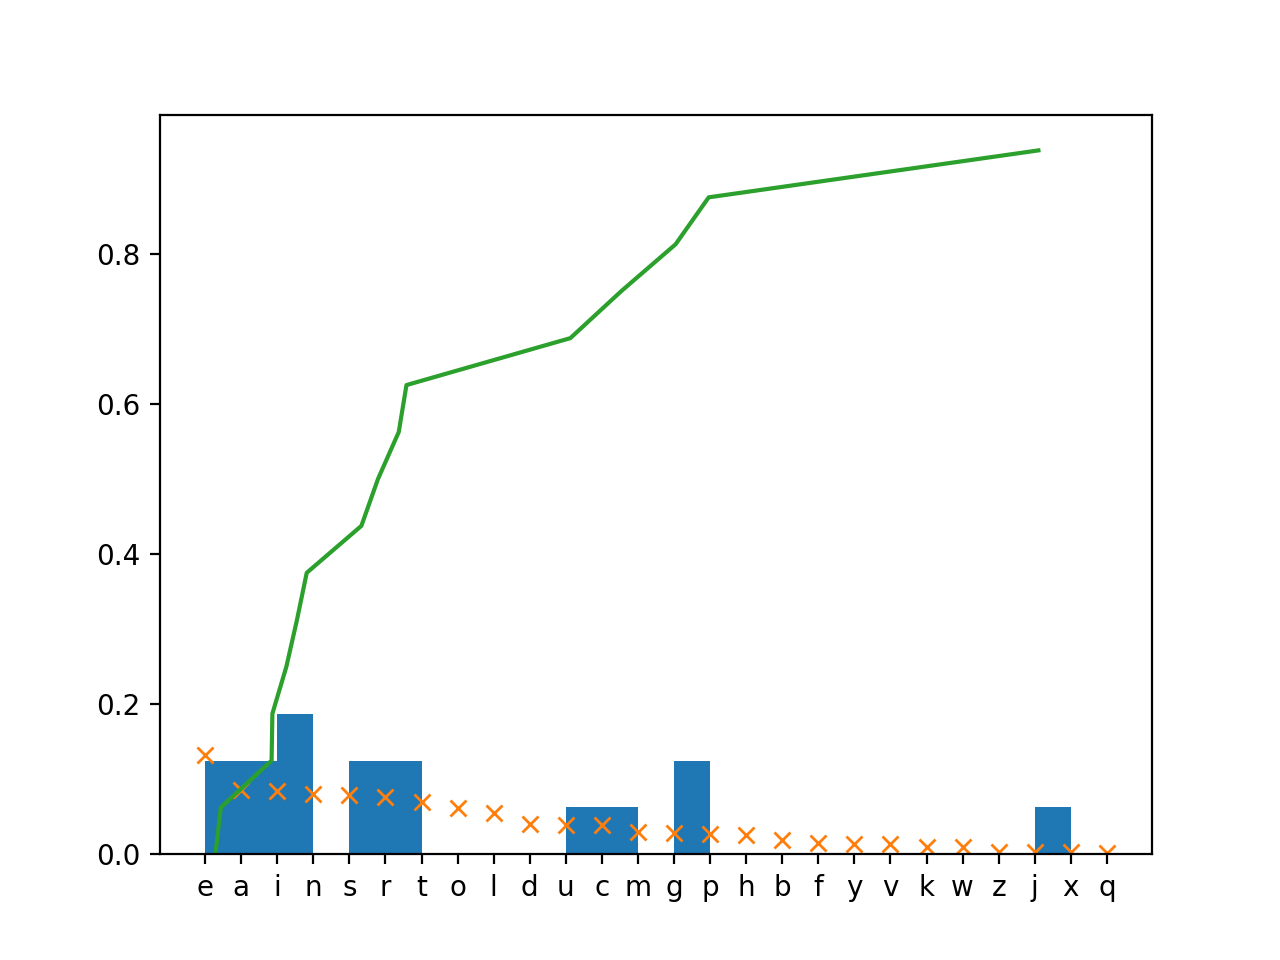

In [30]:
# inverse_F = lambda Fx: - np.log(1 - Fx / popt[0] * popt[1] * c_normalize) / popt[1]
inverse_F = lambda Fx: - np.log(1 - Fx / 1.0693971713288601) / 0.10940017078712243
generate_sample = lambda size: inverse_F(np.random.uniform(size=size))

sample = generate_sample(10000)
sample16 = generate_sample(16)

plt.figure('10k sample')
plt.hist(sample, bins = range(26), density = True)
plt.plot(list(stats), stats.T['mean'] / c_normalize, 'x')
plt.plot(np.sort(sample), np.linspace(0, 1, len(sample), endpoint=False))

plt.figure('16 sample')
plt.hist(sample16, bins = range(26), density = True)
plt.plot(list(stats), stats.T['mean'] / c_normalize, 'x')
plt.plot(np.sort(sample16), np.linspace(0, 1, len(sample16), endpoint=False))
plt.show()

## Vowel/consonant ratio
If you'll run the previous cell several times and observe the set of generated lettters after each run, you'll see that half+ of the sample are vowels. Let's try checking what the ratio would be for the set of words we have.

In [53]:
import re

for letter_set in [vowels, consonants]:
    pattern = re.compile('[{0}]'.format(letter_set))
    applicable_words[letter_set] = applicable_words.apply(lambda row: len(pattern.findall(row['words'])), axis = 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [97]:
print(applicable_words.loc[:,vowels:consonants].describe())
print(applicable_words.loc[applicable_words['len'] >= 10].loc[applicable_words[vowels] >= 6, 'words':vowels[-1]])
# stats16 = applicable_words.loc[applicable_words['len'] == 16].describe().loc[:,vowels[0]:consonants[-1]]
# print(stats16.T['mean'])
stats16 = applicable_words.loc[applicable_words['len'] >= 14].describe().loc[:,vowels:consonants]
print(stats16)

             aeiouy  bcdfghjklmnpqrstvwxz
count  62538.000000          62538.000000
mean       2.910422              4.393009
std        1.139025              1.557592
min        0.000000              0.000000
25%        2.000000              3.000000
50%        3.000000              4.000000
75%        4.000000              5.000000
max        8.000000             11.000000
                words  len  a  e  i  o  u  y
58       abbreviation   12  2  1  2  1  0  0
59      abbreviations   13  2  1  2  1  0  0
139      abolitionist   12  1  0  3  2  0  0
140     abolitionists   13  1  0  3  2  0  0
144       abomination   11  2  0  2  2  0  0
...               ...  ... .. .. .. .. .. ..
60080  voluptuousness   14  0  1  0  2  3  0
60114     voraciously   11  1  0  1  2  1  1
60412     wainamoinen   11  2  1  2  1  0  0
62246      yugoslavia   10  2  0  1  1  1  1
62495   zufriedenheit   13  0  3  2  0  1  0

[1304 rows x 8 columns]
           aeiouy  bcdfghjklmnpqrstvwxz
count  527.000000

It seems interesting to use statistics of long words as a base for reasonable limits on vowels/consonants ratio. The rationale is that there can be only one 16-letter word on the field (the proof is that there are only 8 letters with frequency greater than one among 16-letter words), and it would definitely be cool to come up with it given such a chance. After playing around with this data for some time I decided to just limit the maximal number of vowels to 8, and minimal number of vowels to 3. So the algorithm would be to generate 3 vowels based on the statistics of long words (14+ letters), and then generate the rest 13 letters using the full statistics for the full set of letters. Individual limits for the specific letters should still be controlled, so when some letter hits its limit the idea is to pop it out of the set of letters and redistribute all remaining letters evenly. The specific implementation and aprobation is yet to be done :)